#О данном ноутбуке

В этом ноутбуке происходит обучение полносвязной нейронной сети для предсказания года выпуска песни по ее аудио-признакам.

Для этого используется [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

## Часть 1 - Подготовка данных

In [1]:
import os
import pandas as pd
import numpy as np
import torch

def download_data():
  data_path = 'data.txt.zip'
  if not os.path.exists(data_path):
    print("Downloading data")
    os.system('wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip')
  else:
    print("Data already exists")

In [2]:
download_data()

Data already exists


In [3]:
df = pd.read_csv('data.txt.zip', header=None)

Взглянем на наши данные

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Разделим наши данные не признаки и целевую переменную

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

Теперь посмотрим на распределение нашей целевой переменной

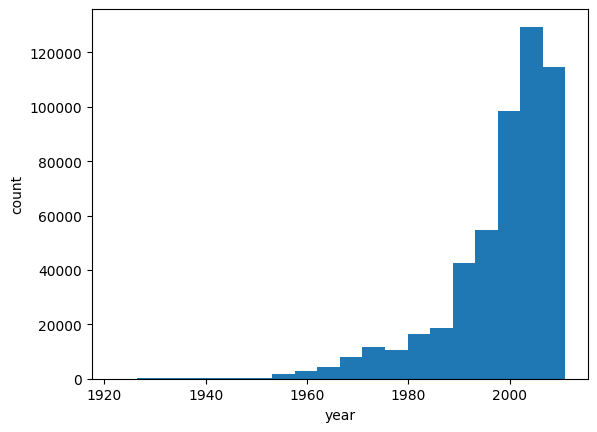

Range: 1922 - 2011
Unique values: 89


In [7]:
import matplotlib.pyplot as plt

plt.hist(y, bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {y.min()} - {y.max()}')
print(f'Unique values: {np.unique(y).size}')

Как видим по графикам и статистикам хорошо бы провести нормализацию наших данных

In [8]:
# Для features сделаем мини-максную нормализацию

X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_normalized = (X - X_min)/(X_max - X_min)

# Для years вычтем мин, чтобы привести в отрезок 0-89

y_min = 1922 # Можно было вызвать min при желании
y_normalized = y - y_min

In [9]:
# Разделим выборки на обучающую, тестовую и валидационную
from sklearn.model_selection import train_test_split

# Возьмем 20% на тест и 10% на валидацию
test_size = 0.2
val_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=test_size, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size / (1 - test_size), random_state=42)

In [10]:
# Наконец упакуем все в tensor_dataset и в Dataloader для ускорения последующего обучения

from torch.utils.data import TensorDataset, DataLoader

train_ds = TensorDataset(
    torch.tensor(X_train.values, dtype=torch.float32),
    torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
)

val_ds = TensorDataset(
    torch.tensor(X_val.values, dtype=torch.float32),
    torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
)

test_ds = TensorDataset(
    torch.tensor(X_test.values, dtype=torch.float32),
    torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
)

train_dl = DataLoader(train_ds, batch_size=100, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=100)
test_dl = DataLoader(test_ds, batch_size=100)


## Часть 2 - Переходим к модельке (MLP)

В соответствии с данной [статьей](https://samyzaf.com/ML/song_year/song_year.html) даже неглубокая модель выдает качетсво в районе 98%. Попробуем воспроизвести данный результат. Стоит правда отметить, что в их случае при подсчете acuracy было выбрано допустимое окно в 10 лет, хехе.

Мы же задачу будем рассматривать как задачу регресси, так что для начала поставим цель - MSE где-то в районе 90, потому что это будет как раз почти предельное значение для окна в 10 лет в среднем. Дисклеймер - такой результат выдает Ridge регрессия с использованием регуляризации, что можно считать за baseline

In [11]:
# Сам MLP

import torch
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(90,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64, 1)
    )
  def forward(self, x):
    return self.net(x)

In [12]:
# Добавим пару штучек которые нам помогут при обучении

import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import tqdm
import torch


# Для рисовашек

def plot_losses(train_losses, train_metrics, val_losses, val_metrics):

    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('metric')
    plt.show()


# Само обучение модели
def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, num_epochs):

    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in tqdm(range(1, num_epochs + 1), desc="Epochs"):

        # Непосредственно обучение
        model.train()
        running_loss, running_metric = 0.0, 0.0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if isinstance(metric_value, torch.Tensor):
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.size(0)
                running_metric += metric_value * X_batch.size(0)

        train_losses.append(running_loss / len(train_loader.dataset))
        train_metrics.append(running_metric / len(train_loader.dataset))

        # Валидация
        model.eval()
        running_loss, running_metric = 0.0, 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                metric_value = metric(predictions, y_batch)
                if isinstance(metric_value, torch.Tensor):
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.size(0)
                running_metric += metric_value * X_batch.size(0)

        val_losses.append(running_loss / len(val_loader.dataset))
        val_metrics.append(running_metric / len(val_loader.dataset))

    print("\nTraining Results:")
    print(f"Final Train Loss: {train_losses[-1]:.4f}")
    print(f"Final Train MSE: {train_metrics[-1]:.4f}")
    print("\nValidation Results:")
    print(f"Final Validation Loss: {val_losses[-1]:.4f}")
    print(f"Final Validation MSE: {val_metrics[-1]:.4f}")

    return train_losses, train_metrics, val_losses, val_metrics


In [13]:
from sklearn.metrics import mean_squared_error


basic_MLP = MLP()
loss_function = nn.MSELoss()
opt = torch.optim.Adam(basic_MLP.parameters(), lr=0.01)

train_loses_basic, train_metrics_basic, val_losses_basic, val_metrics_basic = train_and_validate(
            model=basic_MLP,
            optimizer=opt,
            criterion=loss_function,
            metric = lambda x, y: mean_squared_error(x, y),
            train_loader=train_dl,
            val_loader=val_dl,
            num_epochs=5)


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]


Training Results:
Final Train Loss: 91.6905
Final Train MSE: 91.6905

Validation Results:
Final Validation Loss: 93.4903
Final Validation MSE: 93.4903


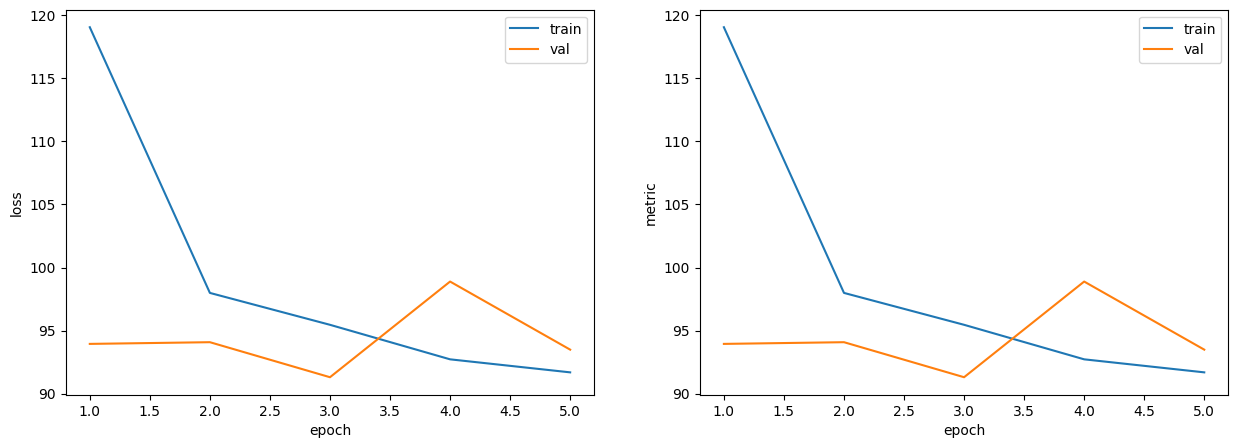

In [14]:
plot_losses(train_loses_basic, train_metrics_basic, val_losses_basic, val_metrics_basic)

In [15]:
basic_MLP.eval()
running_loss, running_metric = 0.0, 0.0

with torch.no_grad():
    for X_batch, y_batch in test_dl:
        predictions = basic_MLP(X_batch)
        loss = loss_function(predictions, y_batch)
        metric_value = mean_squared_error(predictions, y_batch)
        running_loss += loss.item() * X_batch.size(0)
        running_metric += metric_value * X_batch.size(0)

test_loss = running_loss / len(test_dl.dataset)
test_metric = running_metric / len(test_dl.dataset)

print("\nTest Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MSE: {test_metric:.4f}")



Test Results:
Test Loss: 93.0070
Test MSE: 93.0070


Как видим мы смогли получить качество сопоставимое с Ridge регрессией и теперь можем попробовать поменять конфигурацию сети и покрутить разные параметры

## Часть 3 - пробуем менять конфигурации и крутить гиперпараметры

Для начала попробуем подкорректировать learning rate для Adam (значение 0.01 считается довольно агрессивным)

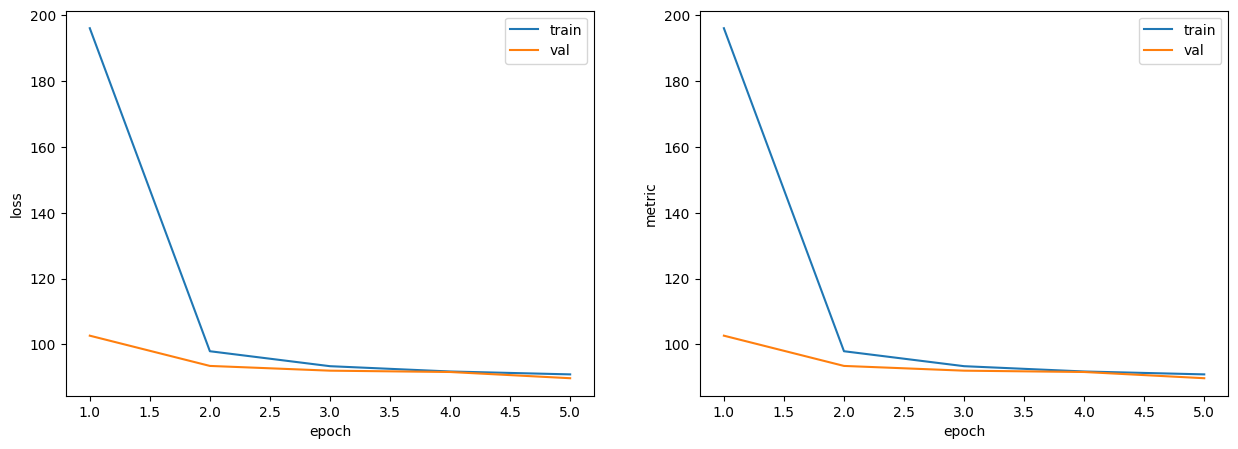


Test Results:
Test Loss: 89.3829
Test MSE: 89.3829


In [16]:
basic_MLP = MLP()
loss_function = nn.MSELoss()
opt = torch.optim.Adam(basic_MLP.parameters(), lr=0.001) # Уменьшили lr для более плавного обучения

train_loses_basic, train_metrics_basic, val_losses_basic, val_metrics_basic = train_and_validate(
            model=basic_MLP,
            optimizer=opt,
            criterion=loss_function,
            metric = lambda x, y: mean_squared_error(x, y),
            train_loader=train_dl,
            val_loader=val_dl,
            num_epochs=5)

plot_losses(train_loses_basic, train_metrics_basic, val_losses_basic, val_metrics_basic)

basic_MLP.eval()
running_loss, running_metric = 0.0, 0.0

with torch.no_grad():
    for X_batch, y_batch in test_dl:
        predictions = basic_MLP(X_batch)
        loss = loss_function(predictions, y_batch)
        metric_value = mean_squared_error(predictions, y_batch)
        running_loss += loss.item() * X_batch.size(0)
        running_metric += metric_value * X_batch.size(0)

test_loss = running_loss / len(test_dl.dataset)
test_metric = running_metric / len(test_dl.dataset)

print("\nTest Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MSE: {test_metric:.4f}")



Результаты получились чуть лучше, но этого мало.

Попробуем добавить Batch Normalization

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLP_modified(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(90,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64, 1)
    )
  def forward(self, x):
    return self.net(x)

In [28]:
modified_MLP = MLP_modified()
loss_function = nn.MSELoss()
opt = torch.optim.Adam(modified_MLP.parameters(), lr=0.001)

train_loses_modified, train_metrics_modified, val_losses_modified, val_metrics_modified = train_and_validate(
            model=modified_MLP,
            optimizer=opt,
            criterion=loss_function,
            metric = lambda x, y: mean_squared_error(x, y),
            train_loader=train_dl,
            val_loader=val_dl,
            num_epochs=5)



Epochs:   0%|          | 0/5 [00:00<?, ?it/s]


Training Results:
Final Train Loss: 77.7176
Final Train MSE: 77.7176

Validation Results:
Final Validation Loss: 79.3440
Final Validation MSE: 79.3440


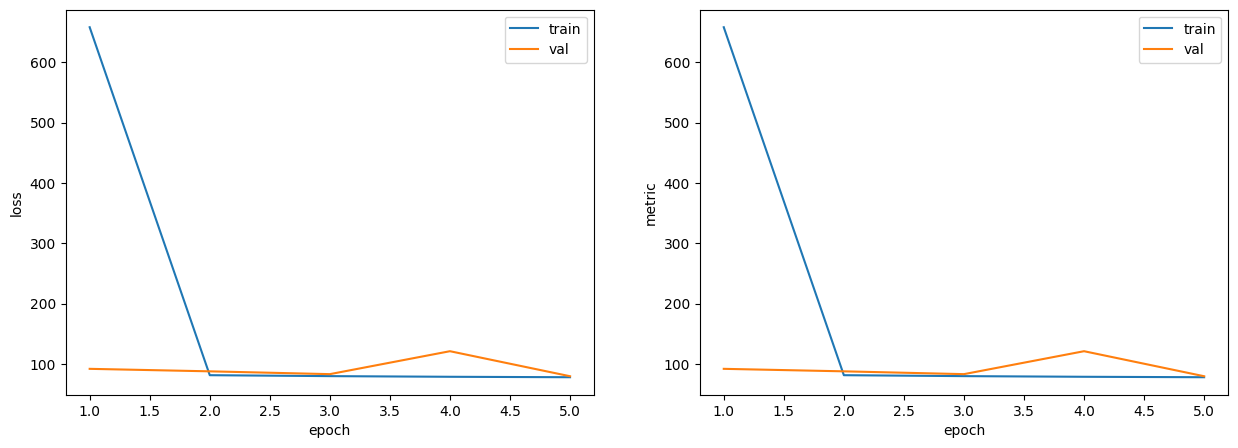

In [29]:
plot_losses(train_loses_modified, train_metrics_modified, val_losses_modified, val_metrics_modified)

In [30]:
modified_MLP.eval()
running_loss, running_metric = 0.0, 0.0

with torch.no_grad():
    for X_batch, y_batch in test_dl:
        predictions = modified_MLP(X_batch)
        loss = loss_function(predictions, y_batch)
        metric_value = mean_squared_error(predictions, y_batch)
        running_loss += loss.item() * X_batch.size(0)
        running_metric += metric_value * X_batch.size(0)

test_loss = running_loss / len(test_dl.dataset)
test_metric = running_metric / len(test_dl.dataset)

print("\nTest Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MSE: {test_metric:.4f}")


Test Results:
Test Loss: 79.5353
Test MSE: 79.5353


Как видим Batch Normalization действительно помогла нам значительно снизить ошибку нашей модели.

Теперь попробуем добавть Dropout, когда после функции активации мы хотим занулить некоторые элементы

In [33]:
class MLP_modified_Drop(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(90,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64, 1)
    )
  def forward(self, x):
    return self.net(x)

In [34]:
modified_MLP_drop = MLP_modified_Drop()
loss_function = nn.MSELoss()
opt = torch.optim.Adam(modified_MLP_drop.parameters(), lr=0.001)

train_loses_drop, train_metrics_drop, val_losses_drop, val_metrics_drop = train_and_validate(
            model=modified_MLP_drop,
            optimizer=opt,
            criterion=loss_function,
            metric = lambda x, y: mean_squared_error(x, y),
            train_loader=train_dl,
            val_loader=val_dl,
            num_epochs=5)



Epochs:   0%|          | 0/5 [00:00<?, ?it/s]


Training Results:
Final Train Loss: 81.2423
Final Train MSE: 81.2423

Validation Results:
Final Validation Loss: 78.4003
Final Validation MSE: 78.4003


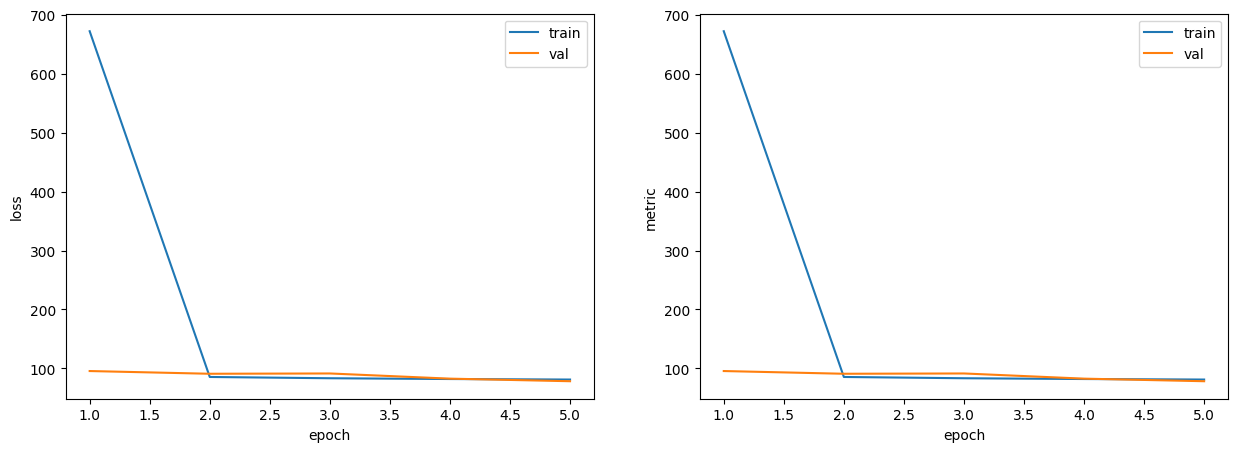

In [35]:
plot_losses(train_loses_drop, train_metrics_drop, val_losses_drop, val_metrics_drop)

In [37]:
modified_MLP_drop.eval()
running_loss, running_metric = 0.0, 0.0

with torch.no_grad():
    for X_batch, y_batch in test_dl:
        predictions = modified_MLP_drop(X_batch)
        loss = loss_function(predictions, y_batch)
        metric_value = mean_squared_error(predictions, y_batch)
        running_loss += loss.item() * X_batch.size(0)
        running_metric += metric_value * X_batch.size(0)

test_loss = running_loss / len(test_dl.dataset)
test_metric = running_metric / len(test_dl.dataset)

print("\nTest Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MSE: {test_metric:.4f}")


Test Results:
Test Loss: 78.5908
Test MSE: 78.5908


Видим небольшое улучшение. Попробуем также добавить Dropout после второй функции активации

In [39]:
class MLP_modified_Drop2(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(90,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(64, 1)
    )
  def forward(self, x):
    return self.net(x)

In [40]:
modified_MLP_drop2 = MLP_modified_Drop()
loss_function = nn.MSELoss()
opt = torch.optim.Adam(modified_MLP_drop2.parameters(), lr=0.001)

train_loses_drop2, train_metrics_drop2, val_losses_drop2, val_metrics_drop2 = train_and_validate(
            model=modified_MLP_drop2,
            optimizer=opt,
            criterion=loss_function,
            metric = lambda x, y: mean_squared_error(x, y),
            train_loader=train_dl,
            val_loader=val_dl,
            num_epochs=5)



Epochs:   0%|          | 0/5 [00:00<?, ?it/s]


Training Results:
Final Train Loss: 81.0566
Final Train MSE: 81.0566

Validation Results:
Final Validation Loss: 78.0015
Final Validation MSE: 78.0015


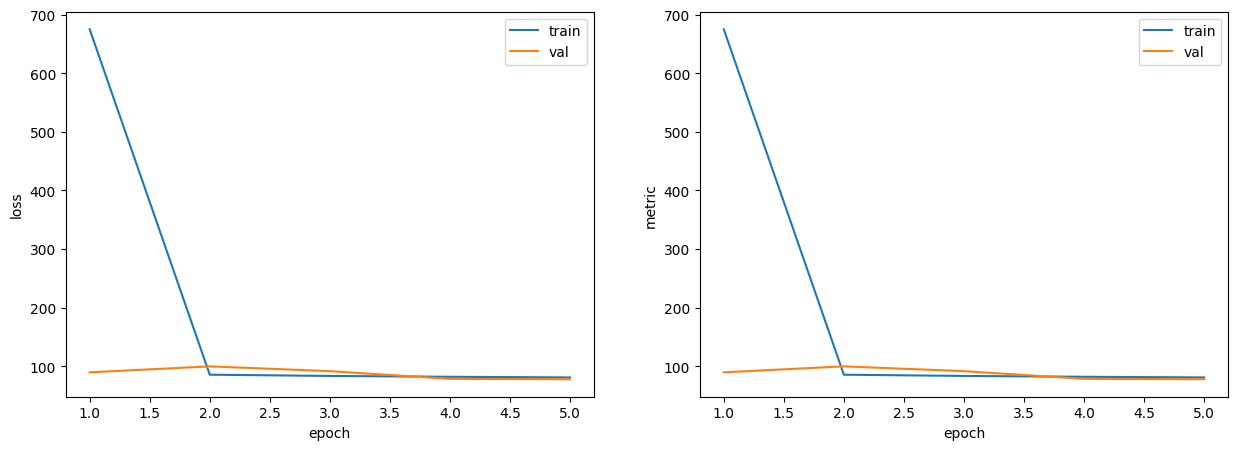

In [41]:
plot_losses(train_loses_drop2, train_metrics_drop2, val_losses_drop2, val_metrics_drop2)

In [42]:
modified_MLP_drop2.eval()
running_loss, running_metric = 0.0, 0.0

with torch.no_grad():
    for X_batch, y_batch in test_dl:
        predictions = modified_MLP_drop2(X_batch)
        loss = loss_function(predictions, y_batch)
        metric_value = mean_squared_error(predictions, y_batch)
        running_loss += loss.item() * X_batch.size(0)
        running_metric += metric_value * X_batch.size(0)

test_loss = running_loss / len(test_dl.dataset)
test_metric = running_metric / len(test_dl.dataset)

print("\nTest Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MSE: {test_metric:.4f}")


Test Results:
Test Loss: 78.2694
Test MSE: 78.2694


Можем заметить что благодаря добавлению Batch Normalization и Dropout мы смогли повысить качество уменьшив ошибку с 93 до 78.2

## Часть 4 - Пробуем обучить глубкоую сеть

Для контраста попробуем обучить более глубокий MLP который будет содержать Residual Connections

In [44]:
# Опишем класс Residual Block

class ResidualBlock(nn.Module):
    def __init__(self, size):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(size, size),
            nn.BatchNorm1d(size),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(size, size),
            nn.BatchNorm1d(size)
        )
    def forward(self, x):
        return x + self.fc(x)  # Вот он наш connection

In [47]:
# Наша более глуюокая сетка

class MLP_residual(nn.Module):
  def __init__(self):
    super().__init__()
    self.input = nn.Linear(90, 128)
    self.block1 = ResidualBlock(128)
    self.block2 = ResidualBlock(128)
    self.fc_mid = nn.Linear(128, 64)
    self.block3 = ResidualBlock(64)
    self.output = nn.Linear(64, 1)

  def forward(self, x):
    x = self.input(x)
    x = self.block1(x)
    x = self.block2(x)
    x = torch.relu(self.fc_mid(x))
    x = self.block3(x)
    return self.output(x)

In [48]:
modified_MLP_big = MLP_residual()
loss_function = nn.MSELoss()
opt = torch.optim.Adam(modified_MLP_big.parameters(), lr=0.001)

train_loses_big, train_metrics_big, val_losses_big, val_metrics_big = train_and_validate(
            model=modified_MLP_big,
            optimizer=opt,
            criterion=loss_function,
            metric = lambda x, y: mean_squared_error(x, y),
            train_loader=train_dl,
            val_loader=val_dl,
            num_epochs=5)



Epochs:   0%|          | 0/5 [00:00<?, ?it/s]


Training Results:
Final Train Loss: 78.7805
Final Train MSE: 78.7805

Validation Results:
Final Validation Loss: 129.7958
Final Validation MSE: 129.7958


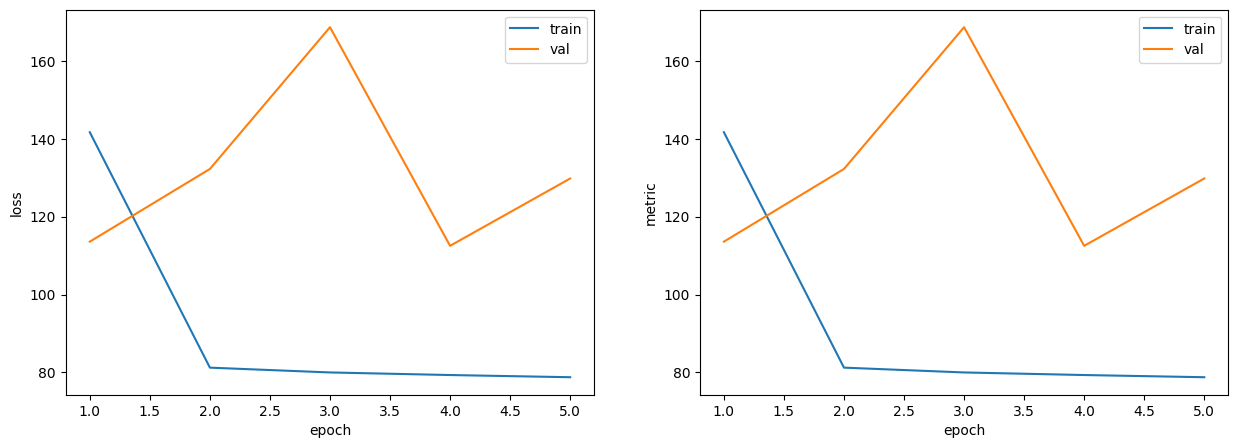

In [49]:
plot_losses(train_loses_big, train_metrics_big, val_losses_big, val_metrics_big)

In [50]:
modified_MLP_big.eval()
running_loss, running_metric = 0.0, 0.0

with torch.no_grad():
    for X_batch, y_batch in test_dl:
        predictions = modified_MLP_big(X_batch)
        loss = loss_function(predictions, y_batch)
        metric_value = mean_squared_error(predictions, y_batch)
        running_loss += loss.item() * X_batch.size(0)
        running_metric += metric_value * X_batch.size(0)

test_loss = running_loss / len(test_dl.dataset)
test_metric = running_metric / len(test_dl.dataset)

print("\nTest Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MSE: {test_metric:.4f}")


Test Results:
Test Loss: 128.8432
Test MSE: 128.8432


Как можем заметить качетсво модели на валидации и тест больше чем на trai (ну и в целом показатели ухудшились) что может свидетельствовать о наличии переобучения в нашей модели. Таким образом большая и глубокая модель не всегда явлется решением и не всегда гарантирует улучшение результата.

## Часть 5 - Попробуем Classic ML - запустим XGBoost

In [51]:
!pip install xgboost

In [56]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
preds = model.predict(X_val)
mse_val = mean_squared_error(y_val, preds)

In [57]:
mse_val

80.79814910888672

In [58]:
preds_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, preds_test)

In [59]:
mse_test

81.12413787841797

Как можем заметить наше самое оптимально решение смогло превзойти решение из коробки. Безусловно здесь необходимо проести правильный подбор гиперпараметров и запустить optuna чтобы сделать точный вывод, но даже с параметрами по умолчанию xgboost показал результат чуть хуже.

Однако стоит заметить, что xgboost обучался намного быстрее нашей модели, поэтому тут идет trade-off между качеством и скоротью.

Таким образом в рамках данного ноутбука был реализован MLP и его различные модификации для решения задачи сопоставления песни и ее года выпуска.